<a href="https://colab.research.google.com/github/AIsari017/KazakhOrnamentsIdentifier/blob/main/ornaments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
import pathlib
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your dataset in Google Drive
data_dir = pathlib.Path('/content/drive/My Drive/ai')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_extensions = ['jpg', 'JPG', 'jpeg', 'JPEG', 'png', 'PNG', 'bmp', 'BMP', 'gif', 'GIF']
image_count = sum(len(list(data_dir.glob(f'*/*.{ext}'))) for ext in image_extensions)
print(f"Total images found: {image_count}")

Total images found: 119


In [ ]:
batch_size = 32
img_height = 180
img_width = 180;

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 119 files belonging to 4 classes.
Using 96 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 119 files belonging to 4 classes.
Using 23 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['kaz', 'kos', 'koshkar', 'tortulak']


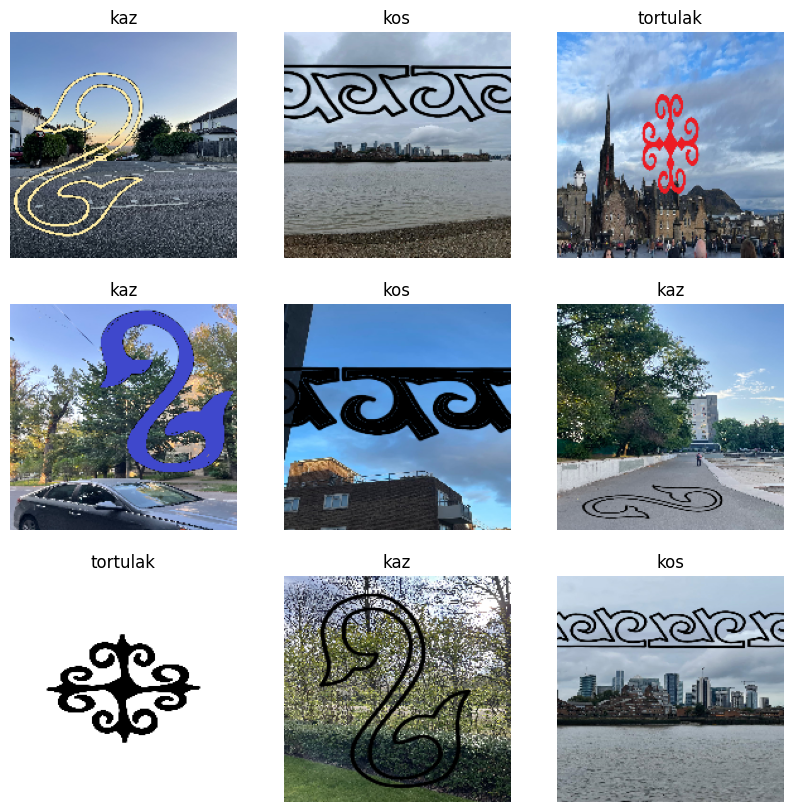

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Create the normalization layer
normalization_layer = layers.Rescaling(1./255)

# Apply the normalization layer to the training dataset
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Get a batch of normalized images
image_batch, labels_batch = next(iter(normalized_ds))

# Select the first image from the batch
first_image = image_batch[0]

# Print the minimum and maximum pixel values of the first image
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 2.5882 - accuracy: 0.3438 - val_loss: 1.3426 - val_accuracy: 0.2174
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.4758 - accuracy: 0.2292 - val_loss: 1.3875 - val_accuracy: 0.3913
Epoch 3/10
3/3 [==============================] - 3s 981ms/step - loss: 1.3026 - accuracy: 0.5104 - val_loss: 1.4568 - val_accuracy: 0.2174
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.2296 - accuracy: 0.5833 - val_loss: 1.4404 - val_accuracy: 0.1304
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 1.0731 - accuracy: 0.5938 - val_loss: 1.2461 - val_accuracy: 0.4348
Epoch 6/10
3/3 [==============================] - 4s 2s/step - loss: 0.9269 - accuracy: 0.7083 - val_loss: 1.3932 - val_accuracy: 0.3478
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.7605 - accuracy: 0.7083 - val_loss: 1.1308 - val_accuracy: 0.5652
Epoch 8/10
3/3 [======================

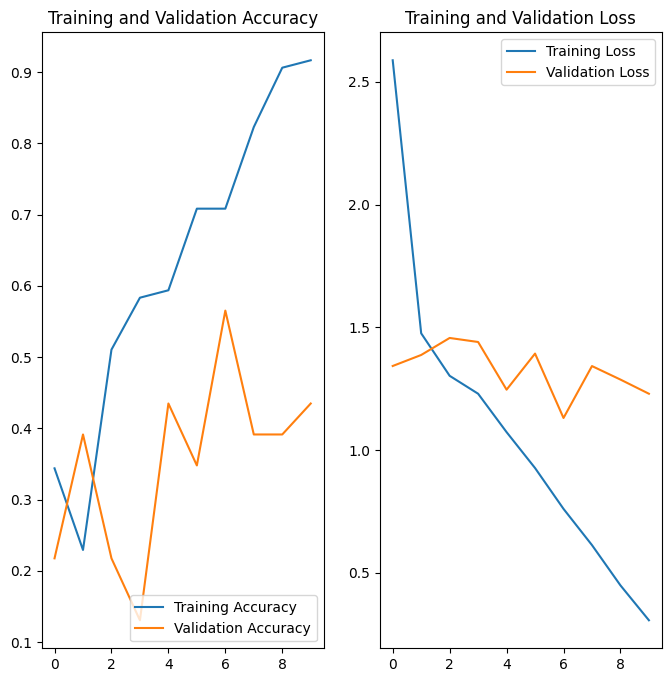

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

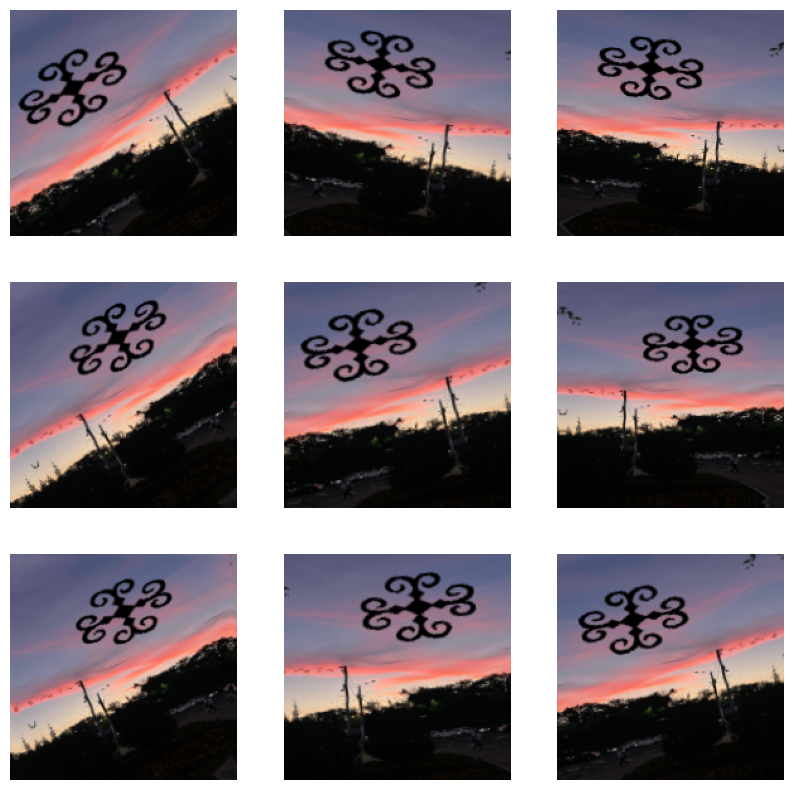

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
3/3 [==============================] - 5s 1s/step - loss: 2.6924 - accuracy: 0.2396 - val_loss: 1.3480 - val_accuracy: 0.4783
Epoch 2/25
3/3 [==============================] - 5s 2s/step - loss: 1.3952 - accuracy: 0.2812 - val_loss: 1.4044 - val_accuracy: 0.2609
Epoch 3/25
3/3 [==============================] - 3s 1s/step - loss: 1.3901 - accuracy: 0.4062 - val_loss: 1.3988 - val_accuracy: 0.3043
Epoch 4/25
3/3 [==============================] - 3s 1s/step - loss: 1.3448 - accuracy: 0.3438 - val_loss: 1.4256 - val_accuracy: 0.2609
Epoch 5/25
3/3 [==============================] - 5s 2s/step - loss: 1.3073 - accuracy: 0.4479 - val_loss: 1.4307 - val_accuracy: 0.3478
Epoch 6/25
3/3 [==============================] - 3s 1s/step - loss: 1.2652 - accuracy: 0.5000 - val_loss: 1.4343 - val_accuracy: 0.3478
Epoch 7/25
3/3 [==============================] - 5s 2s/step - loss: 1.2033 - accuracy: 0.5729 - val_loss: 1.4524 - val_accuracy: 0.3478
Epoch 8/25
3/3 [=========================

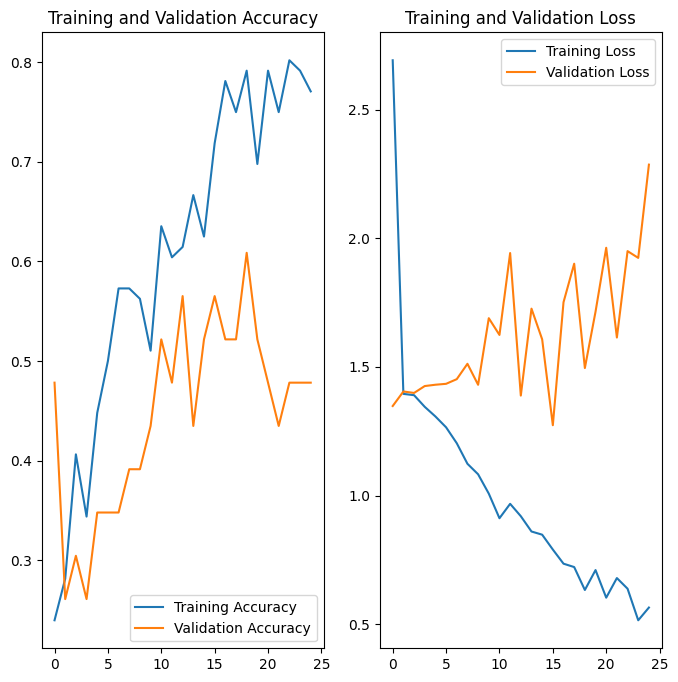

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


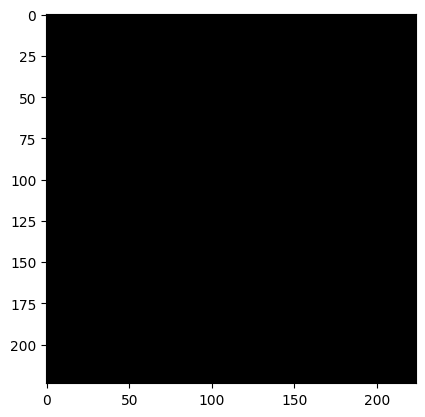

Epoch 1/10
4/4 [==============================] - 20s 4s/step - loss: 8.9140 - accuracy: 0.2353
Epoch 2/10
4/4 [==============================] - 17s 4s/step - loss: 1.4886 - accuracy: 0.2353
Epoch 3/10
4/4 [==============================] - 17s 4s/step - loss: 1.3828 - accuracy: 0.2521
Epoch 4/10
4/4 [==============================] - 24s 4s/step - loss: 1.3850 - accuracy: 0.2773
Epoch 5/10
4/4 [==============================] - 17s 4s/step - loss: 1.3680 - accuracy: 0.3193
Epoch 6/10
4/4 [==============================] - 18s 4s/step - loss: 1.3593 - accuracy: 0.3445
Epoch 7/10
4/4 [==============================] - 17s 4s/step - loss: 1.3175 - accuracy: 0.3613
Epoch 8/10
4/4 [==============================] - 17s 4s/step - loss: 1.3196 - accuracy: 0.3529
Epoch 9/10
4/4 [==============================] - 17s 4s/step - loss: 1.2569 - accuracy: 0.3613
Epoch 10/10
4/4 [==============================] - 17s 4s/step - loss: 1.1467 - accuracy: 0.4958


In [ ]:
from google.colab import drive
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your dataset in Google Drive
data_dir = pathlib.Path('/content/drive/My Drive/ai')

# Load images and labels into arrays
def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    class_names = os.listdir(folder)
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = Image.open(img_path).convert('RGB')  # Ensure 3 color channels
            img = img.resize(target_size)  # Resize image to target size
            if img is not None:
                images.append(np.array(img))
                labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset
X_train, y_train = load_images_from_folder(data_dir)

# Normalize the pixel values
X_train = X_train / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)  # Assuming 4 classes

# Create an instance of ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Example of generating augmented images
augmented_images = next(datagen.flow(X_train, batch_size=1))

# To visualize an augmented image
import matplotlib.pyplot as plt

plt.imshow(augmented_images[0].astype('uint8'))
plt.show()

# Define your model (example using a simple CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10)

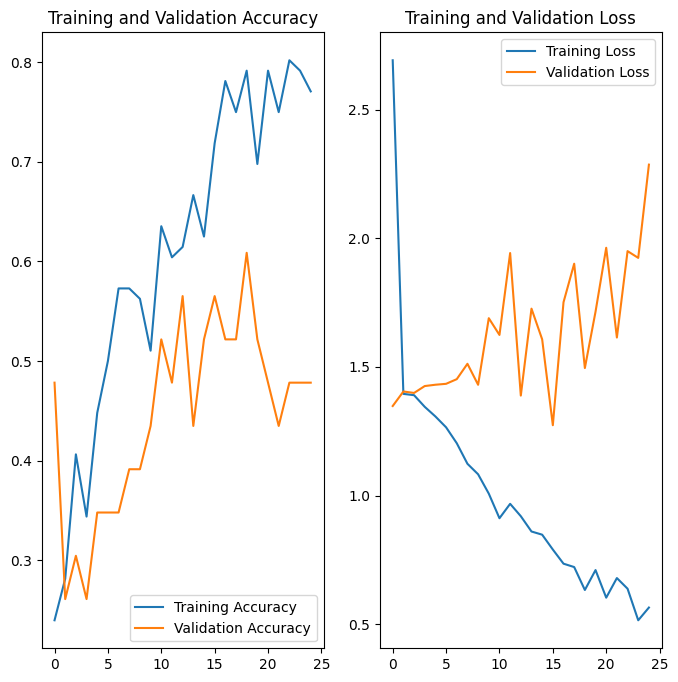

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.utils import get_file, load_img, img_to_array
import tensorflow as tf
import numpy as np

image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkNpUKIhWqBPrzikNExKhZm0DjwBZe8XumFg&s"
image_path = get_file('sample_image', origin=image_url)


img_height = 224
img_width = 224

img = load_img(image_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_names = ["koshkar", "tortulak", "kos", "kaz"]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 116ms/step
This image most likely belongs to koshkar with a 47.54 percent confidence.


In [ ]:
from tensorflow.keras.utils import get_file, load_img, img_to_array
import tensorflow as tf
import numpy as np

# Define the URL for the image you want to use
image_url = "https://img.freepik.com/premium-vector/kazakh-national-ornament-tortkulak_876826-9.jpg"
image_path = get_file('sample_image', origin=image_url)

img_height = 224
img_width = 224

img = load_img(image_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_names = ["koshkar", "tortulak", "kos", "kaz"]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 122ms/step
This image most likely belongs to koshkar with a 47.54 percent confidence.


Image shape: (1, 224, 224, 3)


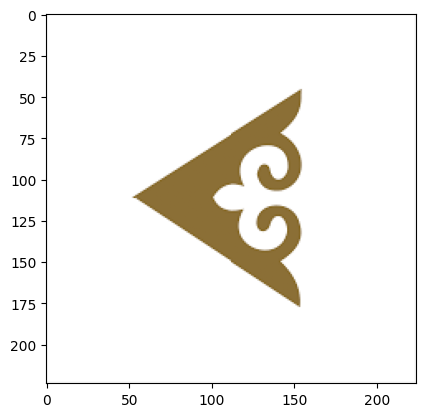

1/1 [==============================] - 0s 62ms/step
This image most likely belongs to koshkar with a 47.54 percent confidence.
Class probabilities: [0.47536692 0.17487772 0.17487772 0.17487772]
Image shape: (1, 224, 224, 3)


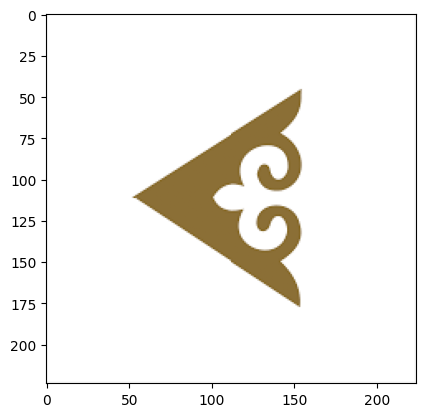

1/1 [==============================] - 0s 61ms/step
This image most likely belongs to koshkar with a 47.54 percent confidence.
Class probabilities: [0.47536692 0.17487772 0.17487772 0.17487772]


In [ ]:
from tensorflow.keras.utils import get_file, load_img, img_to_array
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_url):
    image_path = get_file('sample_image', origin=image_url)
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    return img_array

image_urls = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkNpUKIhWqBPrzikNExKhZm0DjwBZe8XumFg&s",
    "https://img.freepik.com/premium-vector/kazakh-national-ornament-tortkulak_876826-9.jpg"  # Replace with a valid URL for the second image
]

class_names = ["koshkar", "tortulak", "kos", "kaz"]

for image_url in image_urls:
    img_array = load_and_preprocess_image(image_url)

    print(f"Image shape: {img_array.shape}")

    plt.imshow(img_array[0] / 255.0)
    plt.show()

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    print("Class probabilities:", score.numpy())

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

from google.colab import drive
import pathlib
import tensorflow as tf

drive.mount('/content/drive')

image_path = pathlib.Path('/content/drive/My Drive/IMG_4650.png')

img_height = 224
img_width = 224

img = load_img(image_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 75ms/step
This image most likely belongs to kos with a 47.54 percent confidence.


In [ ]:
from tensorflow.keras.utils import get_file, load_img, img_to_array
import tensorflow as tf
import numpy as np

drive.mount('/content/drive')

image_path = ('/content/drive/ai')

img - load_img(image_path